In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
from sklearn.datasets import load_boston
boston_data = load_boston()


c:\Users\gabri\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset 

In [4]:
d = boston_data['data']
d2 = d[:, [2,5]] #wyciągamy tylko 2 cechy: INDUS, RM
target = boston_data['target']

In [7]:
print (len(d2))

506


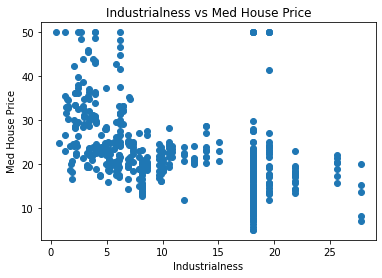

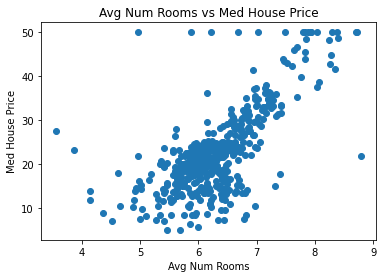

In [6]:
plt.title('Industrialness vs Med House Price')
plt.scatter(d2[:, 0], target)
plt.xlabel('Industrialness')
plt.ylabel('Med House Price')
plt.show()

plt.title('Avg Num Rooms vs Med House Price')
plt.scatter(d2[:, 1], target)
plt.xlabel('Avg Num Rooms')
plt.ylabel('Med House Price')
plt.show()

In [7]:
def loss_function(w1, w2, w0, X, t):
    """
    tutaj zdefiniuj funkcję, która przyjmuje jako argument wagi
    (w1,w2,w0), dane w postaci listy list (X) oraz wartosci (t),
    a ktora zwraca wartosc funkcji kosztu.
    """
    pass

Zadanie1: Uzupełnij definicję powyższej funkcji.


In [8]:
def loss_function(w1, w2, w0, X, t):
    
    suma = 0
    for i in range (len(t)):
        zawartoscnawiasu = (w1 * (X[i][0]) + w2 * (X[i][1]) + w0 - t[i])**2
        suma += zawartoscnawiasu
    wynik = 1/(2*(len(d2))) * suma
    return wynik



In [9]:
loss_function(3, 8, -1, d2, target)

2088.9192750474317

In [ ]:
def update_weigths(w1, w2, w0, X, t, eta):
    """
    tutaj zdefiniuj funkcję, która przyjmuje jako argument wagi
    (w1,w2,w0), dane (X), wartosci (t) oraz wspolczynnik uczenia
    (eta), a ktora zwraca zaktualizowane wartosci w1, w2, w0
    """
    pass

Zadanie2: Uzupełnij definicję powyższej funkcji.

In [10]:
def update_weigths(w1, w2, w0, X, t, eta):
    
    n = len(t)
    
    suma_0 = 0 
    suma_1 = 0
    suma_2 = 0
    for i in range (n):
        zawartoscnawiasu = w1 * (X[i][0]) + w2 * (X[i][1]) + w0 - t[i]
        suma_0 += zawartoscnawiasu
        suma_1 += zawartoscnawiasu * (X[i][0])
        suma_2 += zawartoscnawiasu * (X[i][1])
        
    pochodna_w0 = 1/n*suma_0
    pochodna_w1 = 1/n*suma_1
    pochodna_w2 = 1/n*suma_2 
    
    w1new = w1 - eta*pochodna_w1
    w2new = w2 - eta*pochodna_w2
    w0new = w0 - eta*pochodna_w0

    return w1new, w2new, w0new

In [11]:
update_weigths(3, 8, -1, d2, target, 0.001)

(2.1737704910276685, 7.628145982577075, -1.060154604743083)

Zadanie3: Celem jest zbudowanie modelu regresji liniowej przeiwdującej target w oparciu o d2. Wystartuj z początkowych parametrów 1, 1 oraz 1. Przyjmując eta=0.001 wykonaj 1000 aktualizacji tych parametrów na podstawie metody gradientu. Narysuj zależność funkcji kosztu od numeru iteracji. Wykonaj analogiczne obliczenia dla eta = 0.01 oraz eta = 0.00001. Skomentuj otrzymane wyniki.

In [30]:
w1 = 1
w2 = 1
w0 = 1
loss = []

it = []

it = list(range(1,1001))

for i in range (1000):
    new = update_weigths(w1, w2, w0, d2, target, 0.001)
    w1 = new[0]
    w2 = new[1]
    w0 = new[2]
    #dodajemy do listy kosztów wynik obecnej iteracji:
    loss.append(loss_function (w1, w2, w0, d2, target))
    
print (w1, w2, w0)

-0.5240516597773193 4.3480921568559605 1.2535642605913597


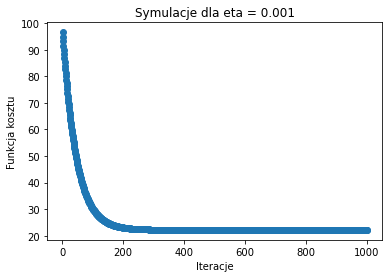

In [24]:
plt.title('Symulacje dla eta = 0.001')
plt.scatter(it, loss)
plt.xlabel('Iteracje')
plt.ylabel('Funkcja kosztu')
plt.show()


In [25]:
w1 = 1
w2 = 1
w0 = 1
loss = []

it = []

it = list(range(1,1001))

for i in range (1000):
    new = update_weigths(w1, w2, w0, d2, target, 0.01)
    w1 = new[0]
    w2 = new[1]
    w0 = new[2]
    #dodajemy do listy kosztów wynik obecnej iteracji:
    loss.append(loss_function (w1, w2, w0, d2, target))

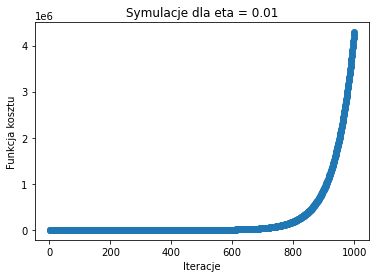

In [26]:
plt.title('Symulacje dla eta = 0.01')
plt.scatter(it, loss)
plt.xlabel('Iteracje')
plt.ylabel('Funkcja kosztu')
plt.show()


In [1]:
w1 = 1
w2 = 1
w0 = 1
loss = []

it = []

it = list(range(1,1001))

for i in range (1000):
    new = update_weigths(w1, w2, w0, d2, target, 0.00001)
    w1 = new[0]
    w2 = new[1]
    w0 = new[2]
    #dodajemy do listy kosztów wynik obecnej iteracji:
    loss.append(loss_function (w1, w2, w0, d2, target))



NameError: name 'update_weigths' is not defined

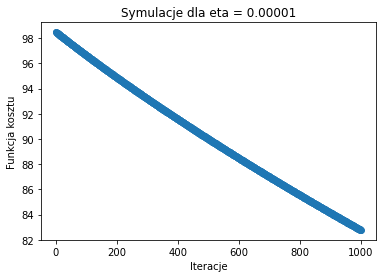

In [28]:
plt.title('Symulacje dla eta = 0.00001')
plt.scatter(it, loss)
plt.xlabel('Iteracje')
plt.ylabel('Funkcja kosztu')
plt.show()


- funkcja kosztu powinna spadać z każdą iteracją, co zgadza się w symulacji dla eta = 0.001 i eta = 0.00001. Moja teoria jest taka, że w przypadku drugiej symulacji te wartości rosną, bo pochodna była dodatnia? (Wyczytałam, że taka jest zależność)

Zadanie4: Zazwyczaj nie wiemy z góry ile razy należy zmodyfikować wagi - kiedy dalsza aktualizacja nie przynosi efektu. Jednym z rozwiązań tego problemu jest sprawdzenie o jaki procent zmieniają sie aktualne wagi. Przyjmijmy, że jeżeli zmiana funkcji kosztu jest mniejsza niż 0,1% to przerywamy działanie. Ile kroków należałoby wykonać aby zrealizować poprzednie zadanie?

In [29]:
w1 = 1
w2 = 1
w0 = 1
loss = []

it = []

it = list(range(1,1001))

for i in range (1000):
    new = update_weigths(w1, w2, w0, d2, target, 0.001)
    w1 = new[0]
    w2 = new[1]
    w0 = new[2]

    #To jest taki bardziej pseudokod, bo nie działa, ale zrobiłabym to tak że w każdej iteracji odejmowałabym wartości wag od wartości z poprzedniej iteracji i sprawdzałabym, 
    #czy ta różnica jest mniejsza niż 0.001
    #i ta pierwsza iteracja która się wyprintuje to jest ta w której możemy przestać
    for i in range (1000):
        if ((new[i+1][0] - new[i][0]) <= 0.001) and ((new[i+1][1] - new[i][1]) <= 0.001) and ((new[i+1][2] - new[i][2]) <= 0.001):
            print (i)
  
    #albo, ale ten sam error
    #if ((w1[i+1] - w1[i]) <= 0.001) and ((w2[+1] - w2[i]) <= 0.001) and ((w0[i+1] - w0[i]) <= 0.001):
    #    print (i)
    
    #Rozumiem o co chodzi w errorze invalid index to scalar variable ale naprawdę nie rozumiem czemu mu to nie pasuje


IndexError: invalid index to scalar variable.

Zadanie5: Porównaj te parametry z otrzymanymi z Zadania3. Z czego może wynikać ta różnica?


In [31]:

model = LinearRegression()
model.fit(d2, target);
model.coef_ #wspolczynnki dla zmiennych


array([-0.33471389,  7.82205511])

In [30]:
model.intercept_ #wyraz wolny

-22.898315729225065

czyli 
w0 z zadania 3:  1.2535642605913597, tutaj: -22.898315729225065
współczynniki w1 i w2 z zadania 3: -0.5240516597773193 4.3480921568559605, tutaj: -0.33471389,  7.82205511
O ile współczynniki są odrobinę podobne (głównie to, że w1 jest w obu przypadkach ujemny, a w2 w obu dodatni) to już w przypadku wyrazu wolnego (jeśli dobrze interpretuję  w0 to wyraz wolny) jest bardzo duża różnica
Mój wniosek na ten moment jest taki, że coś poszło nie tak w zadaniu 3 i nie da się porównywać wyników

Zadanie6: Rozważ jeszcze raz dane d2/target
Podziel je na trzy podzbiory - treningowy (60%), walidacyjny (20%) oraz testowy (20%); najlepiej zdefiniuj odpowiednią funkcję.
Przetestuj różne wartości parametrów  na zbiorze walidacyjnym, na tej podstawie wybierz jeden, który użyjesz do wytrenowania parametrów modelu na zbiórze treningowym.
Na końcu wyznacz wartość funkcji kosztu na zbiorze testowym. Skomentuj otrzymane wyniki.

In [31]:
d2_walid = d2[:303]
d2_tren = d2[304:405]
d2_test = d2[406:]

t_walid = target[:303]
t_tren = target[304:405]
t_test = target[406:]

#testujemy rozne eta


LF = []
w1 = 1
w2 = 1
w0 = 1
for i in range (1000):
    new = update_weigths(w1, w2, w0, d2_walid, t_walid, 0.001)
    lf = loss_function(w1, w2, w0, d2_walid, t_walid)
    LF.append(lf)
    w1 = new[0]
    w2 = new[1]
    w0 = new[2]
    
print(w1,w2,w0)
print(sum(LF)/len(LF))

-0.43806578495613585 4.461777850975811 1.0805786613753983
12.22141862452325


In [32]:
LF = []
w1 = 1
w2 = 1
w0 = 1
for i in range (1000):
    new = update_weigths(w1, w2, w0, d2_walid, t_walid, 0.01)
    lf = loss_function(w1, w2, w0, d2_walid, t_walid)
    LF.append(lf)
    w1 = new[0]
    w2 = new[1]
    w0 = new[2]
    
print(w1,w2,w0)
print(sum(LF)/len(LF))


-0.4102525395406561 4.949662276291204 -2.327693844865539
9.946426381940164


In [34]:

LF = []
w1 = 1
w2 = 1
w0 = 1
for i in range (1000):
    new = update_weigths(w1, w2, w0, d2_walid, t_walid, 0.0001)
    lf = loss_function(w1, w2, w0, d2_walid, t_walid)
    LF.append(lf)
    w1 = new[0]
    w2 = new[1]
    w0 = new[2]
    
print(w1,w2,w0)
print(sum(LF)/len(LF))

0.02005595571285882 3.548372966790141 1.3163134344623948
29.53668243094526


-> Najmniejszy wynik funkcji kosztu uzyskano przy eta = 0.01, więc taka wartość została użyta do trenowania zbioru 

In [36]:
# parametry na zbiorze treningowym, eta=0.01

LF = []
w1 = 1
w2 = 1
w0 = 1
for i in range (1000):
    new = update_weigths(w1, w2, w0, d2_tren, t_tren, 0.01)
    lf = loss_function(w1, w2, w0, d2_tren, t_tren)
    LF.append(lf)
    w1 = new[0]
    w2 = new[1]
    w0 = new[2]
    
print(w1,w2,w0)
print(sum(LF)/len(LF))


3.2150413910203936e+32 1.300609911769724e+32 2.186508710692892e+31
1.512203142856436e+64


In [37]:
#funkcja kosztu na zbiorze testowym

loss_function(w1, w2, w0, d2_test, t_test)

4.263303913024766e+66

Na zbiorze testowym wielkość funkcji kosztu jest jeszcze mniejsza, co oznacza że zbiór został odpowiednio wytrenowany - funkcja kosztu powinna spadać wraz z uczeniem się